In [151]:
from qiskit_ibm_runtime import QiskitRuntimeService



# QiskitRuntimeService 인스턴스 생성
service = QiskitRuntimeService(channel='ibm_quantum',
    instance='ibm-q/open/main',
    #token='66f31661ef50e4445acd90ad9c79beda0f25adf297fc1082be7659596b31f08daf9ccf8c5fac93d92edaa1e08b9376efabd86d406b8fed6f45e1f1c334d73cf8')
    token = '06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854')
# 특정 태그를 가진 작업들을 가져오기
tag_to_search = ['ecr','ecr_echo']

# 모든 작업을 가져와서 특정 태그를 가진 작업만 필터링
jobs_with_tag = [job for job in service.jobs() if ('ecr' in job.tags or 'ecr_echo' in job.tags) ]

# 작업 정보 출력
for job in jobs_with_tag:
    if ('ecr' == job.tags[0] or 'ecr_echo' == job.tags[0]):
        job.update_tags(job.tags)
    print(f"Job ID: {job.job_id()}")
    print(f"Job status: {job.status()}")
    print(f"Job backend: {job.backend()}")
    print(f"Job tags: {job.tags}")
    print()






TypeError: argument of type 'NoneType' is not iterable

In [256]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q-skku/skku/skku-students',
    token='06f802eeac992c43c4106753d7c5fc31414a13eb7d91c99d67fb49cc50569e5b4b011f20c71b9607a07cb43ecc7044557c699022db91d1685ba4c886d5886854'
)
job = service.job('cshvc0rea560008f1en0')
job_result = job.result()

# To get counts for a particular pub result, use 
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register. 
# You can use circuit.cregs to find the name of the classical registers.

In [257]:
from qiskit.quantum_info import Pauli, Statevector
import numpy as np
# 10진수 형식의 측정 결과를 2진수 형식으로 변환
def convert_counts_to_binary(counts, num_qubits):
    binary_counts = {}
    for key, value in counts.items():
        binary_key = format(key, f'0{num_qubits}b')
        binary_counts[binary_key] = value
    return binary_counts
# 개별 큐비트의 기대값 계산 함수

def calculate_individual_expectation_values(counts, num_qubits):

    bitstrings = list(counts.keys())
    total_counts = sum(counts.values())
    
    individual_expectation_values = np.zeros(num_qubits)
    
    for i in range(num_qubits):
        p0 = sum(counts[bitstring] for bitstring in bitstrings if bitstring[i] == '0') / total_counts
        p1 = sum(counts[bitstring] for bitstring in bitstrings if bitstring[i] == '1') / total_counts
        individual_expectation_values[i] = p0 - p1  # E[Z_i] = P(0) - P(1)
    
    return np.sum(individual_expectation_values)

def sampler_to_estimator(job, num_qubits):
    """Sampler job이 있을때 그 값을 expectaion value로 바꿔주는 함수
    단 여기서는 single measure기저의 합

    Args:
        job (_type_): _{qiskit job}_
        num_qubits (_int_): _int_

    Returns:
        _list_: _exp_list_
    """
    result = []
    for index,dist in enumerate(job.result()):
        exp_val = calculate_individual_expectation_values(dist.data['c'].get_counts(), num_qubits)
        result.append(exp_val)
    return result

In [258]:
job = service.job('cshvc0rea560008f1en0')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', '(42, 43)', 'ecr']
{'11': 6151, '10': 738, '01': 866, '00': 245}


[-1.95425,
 -1.9280000000000002,
 -1.9012499999999999,
 -1.8865,
 -1.8622500000000002,
 -1.82775,
 -1.79375,
 -1.80025,
 -1.749,
 -1.726,
 -1.68625,
 -1.663,
 -1.64025,
 -1.6195000000000002,
 -1.582,
 -1.5765,
 -1.50975,
 -1.49175,
 -1.4765000000000001,
 -1.43475]

In [259]:

job = service.job('cshvbtz1k2e0008npqt0')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr_echo', '(42, 43)', 'l=1.2']
{'11': 5864, '10': 755, '01': 1043, '00': 338}


[-1.94475,
 -1.91125,
 -1.88325,
 -1.83775,
 -1.802,
 -1.7797500000000002,
 -1.7465000000000002,
 -1.7192500000000002,
 -1.6792500000000001,
 -1.652,
 -1.6247500000000001,
 -1.5830000000000002,
 -1.55925,
 -1.52925,
 -1.4995,
 -1.45475,
 -1.44475,
 -1.41575,
 -1.3815,
 -1.36425]

In [260]:
job = service.job('cshvddd3fxq0008c0p00')
job_result = job.result()
print(job.tags)
job_result[18].data['c'].get_counts()
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr_echo', '(42, 43)', 'l=1']
{'11': 5987, '00': 237, '10': 709, '01': 1067}


[-1.9534999999999998,
 -1.929,
 -1.88275,
 -1.88725,
 -1.847,
 -1.8114999999999999,
 -1.80225,
 -1.77125,
 -1.738,
 -1.7035,
 -1.6820000000000002,
 -1.6675,
 -1.649,
 -1.6147500000000001,
 -1.57225,
 -1.54125,
 -1.502,
 -1.47475,
 -1.4375,
 -1.4080000000000001]

In [261]:
job = service.job('cshvdpp3fxq0008c0p1g')
job_result = job.result()
print(job.tags)
job_result[18].data['c'].get_counts()
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr_echo', '(42, 43)', 'l=1.4']
{'11': 5843, '10': 821, '01': 808, '00': 528}


[-1.938,
 -1.8945,
 -1.86175,
 -1.813,
 -1.7705,
 -1.7432500000000002,
 -1.708,
 -1.6787500000000002,
 -1.6295,
 -1.5975,
 -1.5465,
 -1.53375,
 -1.51975,
 -1.47,
 -1.4495,
 -1.4075,
 -1.3965,
 -1.34825,
 -1.3287499999999999,
 -1.2865]

In [263]:
job = service.job('cshvj89ea560008f1f10')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)


['11', 'ecr_echo', '(42, 43)', 'l=1']
{'10': 681, '11': 6046, '00': 222, '01': 1051}


[-1.9525000000000001,
 -1.9312500000000001,
 -1.90175,
 -1.87625,
 -1.8507500000000001,
 -1.82775,
 -1.7950000000000002,
 -1.77325,
 -1.74425,
 -1.71475,
 -1.6815,
 -1.6849999999999998,
 -1.6325,
 -1.59175,
 -1.5785,
 -1.5557500000000002,
 -1.52375,
 -1.47525,
 -1.4560000000000002,
 -1.416]

In [264]:
job = service.job('cshvnbnp1vzg0089wk70')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr_echo', 'l=1', '(37, 38)']
{'11': 5684, '00': 359, '01': 1413, '10': 544}


[-1.832,
 -1.74625,
 -1.7045000000000001,
 -1.6995,
 -1.6915,
 -1.659,
 -1.646,
 -1.62325,
 -1.58425,
 -1.573,
 -1.53225,
 -1.5175,
 -1.508,
 -1.4935,
 -1.47075,
 -1.4227500000000002,
 -1.38175,
 -1.3567500000000001,
 -1.33125,
 -1.28525]

In [265]:
job = service.job('cshvngp1k2e0008npr80')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr', '(37, 38)']
{'11': 3509, '00': 1312, '01': 1852, '10': 1327}


[-1.86625,
 -1.8267499999999999,
 -1.7715,
 -1.71875,
 -1.65075,
 -1.58925,
 -1.50125,
 -1.4445,
 -1.38725,
 -1.3175,
 -1.2309999999999999,
 -1.163,
 -1.0762500000000002,
 -1.005,
 -0.88575,
 -0.8140000000000001,
 -0.73875,
 -0.6579999999999999,
 -0.54925,
 -0.47525000000000006]

In [266]:
job = service.job('cshvt4rea560008f1fjg')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr', '(37, 38)']
{'11': 3349, '01': 2051, '00': 1153, '10': 1447}


[-1.87625,
 -1.8395,
 -1.792,
 -1.7245,
 -1.663,
 -1.61625,
 -1.5115,
 -1.43775,
 -1.3935,
 -1.3085,
 -1.2105000000000001,
 -1.1420000000000001,
 -1.0287499999999998,
 -0.9762499999999998,
 -0.9112499999999999,
 -0.7989999999999999,
 -0.712,
 -0.6447499999999999,
 -0.549,
 -0.42874999999999996]

In [267]:
job = service.job('cshvwc11k2e0008nprn0')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr_echo', 'l=1', '(37, 38)']
{'11': 5674, '01': 1395, '10': 547, '00': 384}


[-1.8225,
 -1.7437500000000001,
 -1.69475,
 -1.6965000000000001,
 -1.6775,
 -1.6775,
 -1.67025,
 -1.60925,
 -1.58575,
 -1.5690000000000002,
 -1.5482500000000001,
 -1.526,
 -1.49575,
 -1.45775,
 -1.461,
 -1.40825,
 -1.373,
 -1.3210000000000002,
 -1.3225,
 -1.2905]

In [268]:
job = service.job('cshvws33fxq0008c0q8g')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr', '(37, 38)']
{'01': 2009, '11': 3373, '10': 1372, '00': 1246}


[-1.861,
 -1.823,
 -1.7627499999999998,
 -1.69225,
 -1.6484999999999999,
 -1.5605,
 -1.49275,
 -1.439,
 -1.329,
 -1.2737500000000002,
 -1.20475,
 -1.1065,
 -1.05925,
 -0.9452500000000001,
 -0.8605,
 -0.7839999999999999,
 -0.6995,
 -0.6065,
 -0.53175,
 -0.45000000000000007]

In [269]:
job = service.job('cshw0z3p1vzg0089wm1g')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['11', 'ecr', '(37, 38)']
{'01': 1914, '00': 1344, '11': 3347, '10': 1395}


[-1.87175,
 -1.845,
 -1.7990000000000002,
 -1.72175,
 -1.66425,
 -1.605,
 -1.53525,
 -1.469,
 -1.3539999999999999,
 -1.26875,
 -1.20825,
 -1.14575,
 -1.04925,
 -0.96,
 -0.8812499999999999,
 -0.79125,
 -0.6817500000000001,
 -0.6224999999999999,
 -0.50075,
 -0.4515]

In [278]:
job = service.job('cshxjhjvnxy0008cxgm0')
job_result = job.result()
print(job.tags)
print(job_result[18].data['c'].get_counts())
sampler_to_estimator(job, 2)

['(40, 39)', '11', 'ecr_echo', 'l=1']
{'00': 429, '11': 4487, '10': 2685, '01': 399}


[-1.806,
 -1.57125,
 -1.24775,
 -1.084,
 -1.058,
 -1.1179999999999999,
 -1.1742499999999998,
 -1.2862500000000001,
 -1.4004999999999999,
 -1.4514999999999998,
 -1.4195,
 -1.3679999999999999,
 -1.27875,
 -1.153,
 -1.04125,
 -1.0285,
 -0.9735,
 -1.0045,
 -1.0145,
 -1.0242499999999999]

In [277]:
job = service.job('cshxjpt1k2e0008npxbg')
job_result = job.result()
print(job.tags)
print(job_result[0].data['c'].get_counts())
sampler_to_estimator(job, 2)

['(40, 39)', '11', 'ecr']
{'11': 7515, '01': 86, '10': 230, '00': 169}


[-1.8365,
 -1.871,
 -1.75725,
 -1.79375,
 -1.745,
 -1.82175,
 -1.76125,
 -1.8027499999999999,
 -1.76,
 -1.75525,
 -1.6895,
 -1.66825,
 -1.69375,
 -1.7155,
 -1.69875,
 -1.6567500000000002,
 -1.6684999999999999,
 -1.6185,
 -1.588,
 -1.5750000000000002]

In [254]:
from qiskit.quantum_info import Pauli, Statevector
import numpy as np
# 10진수 형식의 측정 결과를 2진수 형식으로 변환
def convert_counts_to_binary(counts, num_qubits):
    binary_counts = {}
    for key, value in counts.items():
        binary_key = format(key, f'0{num_qubits}b')
        binary_counts[binary_key] = value
    return binary_counts
# 개별 큐비트의 기대값 계산 함수

def calculate_individual_expectation_values(counts, num_qubits):

    bitstrings = list(counts.keys())
    total_counts = sum(counts.values())
    
    individual_expectation_values = np.zeros(num_qubits)
    
    for i in range(num_qubits):
        p0 = sum(counts[bitstring] for bitstring in bitstrings if bitstring[i] == '0') / total_counts
        p1 = sum(counts[bitstring] for bitstring in bitstrings if bitstring[i] == '1') / total_counts
        individual_expectation_values[i] = p0 - p1  # E[Z_i] = P(0) - P(1)
    
    return np.sum(individual_expectation_values)

def sampler_to_estimator(job, num_qubits):
    """Sampler job이 있을때 그 값을 expectaion value로 바꿔주는 함수
    단 여기서는 single measure기저의 합

    Args:
        job (_type_): _{qiskit job}_
        num_qubits (_int_): _int_

    Returns:
        _list_: _exp_list_
    """
    result = []
    for index,dist in enumerate(job.result()):
        exp_val = calculate_individual_expectation_values(dist.data['c'].get_counts(), num_qubits)
        result.append(exp_val)
    return result

In [255]:
sampler_to_estimator(job, 2)

[-1.9525000000000001,
 -1.9312500000000001,
 -1.90175,
 -1.87625,
 -1.8507500000000001,
 -1.82775,
 -1.7950000000000002,
 -1.77325,
 -1.74425,
 -1.71475,
 -1.6815,
 -1.6849999999999998,
 -1.6325,
 -1.59175,
 -1.5785,
 -1.5557500000000002,
 -1.52375,
 -1.47525,
 -1.4560000000000002,
 -1.416]

In [128]:
ecr_result_dict = {'00':[],'11':[]}

for job in jobs_with_tag:
    result = sampler_to_estimator(job,2)
    ecr_result_dict[job.tags[0]].append(result)

In [129]:
job.tags

['11', 'ecr']

C:\Users\pop75\AppData\Local\Temp\ipykernel_25988\638611057.py:47: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(linear_model_11, lamb, result)


0.01644024494391072 ['11', 'ecr_echo']
0.015597518739066785 ['11', 'ecr']


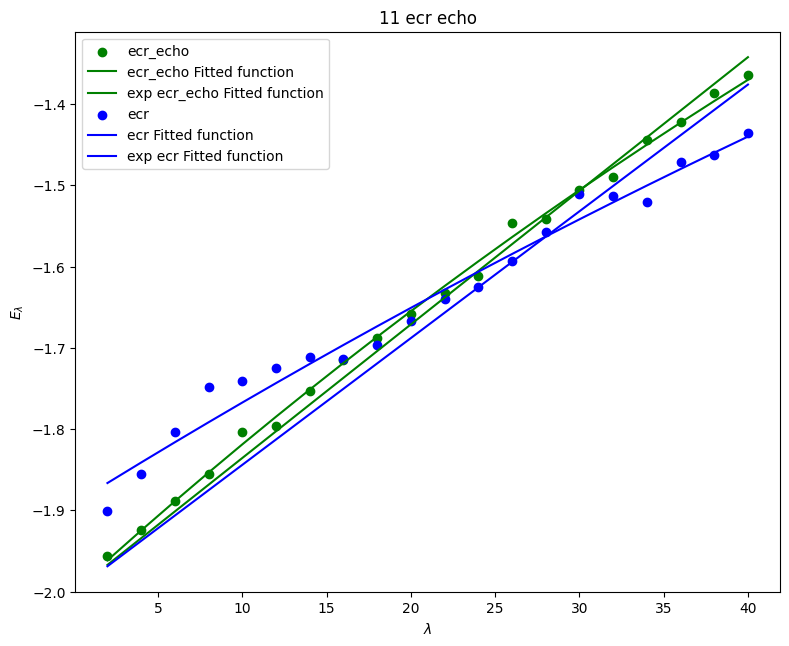

In [150]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
lamb = np.array([2*(j+1) for j in range(20)])
color = {'ecr':'b','ecr_echo':'g'}

# 선형 모델 정의
def linear_model_00(x, a, b):
    return a * x + 2

def linear_model_00(x, a, b):
    return a * x + 2
def linear_model_11(x, a, b):
    return a * x - 2
# 지수 함수 정의
def exp_func(x, a, b, c):
    return b*a **(x) + c

def extrapolate_values_temp(y_data,x_data):
    # 선형 함수 피팅
    # 지수 함수 피팅 초기 추정값 및 범위 설정
    initial_guess = [0.9, 1, 1]
    bounds = ([0, -2, -np.inf], [1, 2, np.inf])

    params_exp, _ = curve_fit(exp_func, x_data, y_data, p0=initial_guess, bounds=bounds, maxfev=10000)
    a_exp, b_exp, c_exp = params_exp
    y_exp_0 = exp_func(0, a_exp, b_exp, c_exp)

    return y_exp_0,params_exp




plt.figure(figsize=(20,16))

jobs_with_tag_temp = [jobs_with_tag[0],jobs_with_tag[5]]
for job in jobs_with_tag_temp:
    result = sampler_to_estimator(job,2)
    
    
    if job.tags[0] == '00':
        index = 1
        params, covariance = curve_fit(linear_model_00, lamb, result)
        a_fit, b_fit = params
    else:
        index= 2
        params, covariance = curve_fit(linear_model_11, lamb, result)
        a_fit, b_fit = params
    _,params = extrapolate_values_temp(result,lamb)
    print(a_fit,job.tags)
    plt.subplot(2,2,index)
    plt.scatter(lamb,result,label = f'{job.tags[1]}',color = color[job.tags[1]])
    if job.tags[0] == '00':
        plt.plot(lamb, linear_model_00(lamb, a_fit, b_fit), label=f'{job.tags[1]} Fitted function', color = color[job.tags[1]])
    else:
        plt.plot(lamb, linear_model_11(lamb, a_fit, b_fit), label=f'{job.tags[1]} Fitted function', color = color[job.tags[1]])
    plt.plot(lamb,exp_func(lamb,*params), label=f'exp {job.tags[1]} Fitted function', color = color[job.tags[1]])
    plt.title(f"{job.tags[0]} ecr echo")
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$E_{\lambda}$')
    plt.legend()

In [146]:
params

array([ 9.90611790e-01, -2.00000000e+00,  1.15816831e-03])

In [125]:
0.008338499999435145/0.012788563056175262

0.6520279067169085

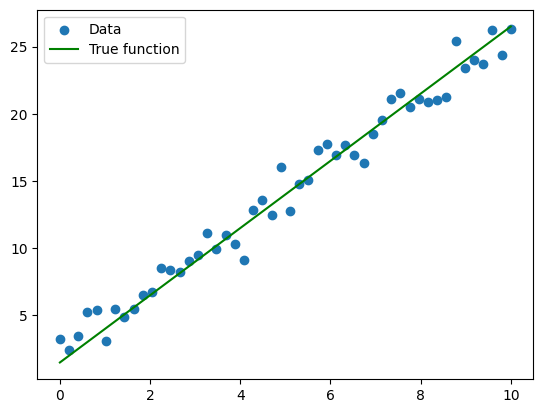

Fitted parameters: a = 2.358837748092015, b = 2.34637053794526


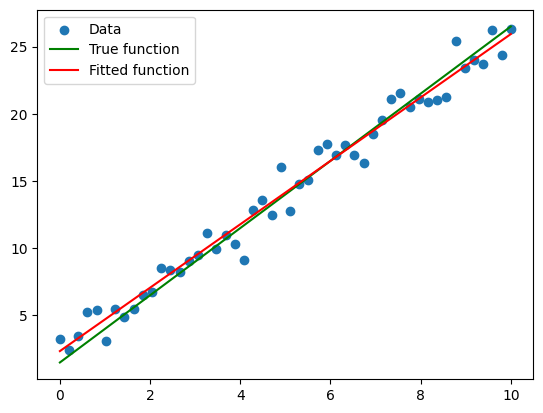

In [103]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# 임의의 함수 정의
def true_function(x):
    return 2.5 * x + 1.5  # 예: y = 2.5x + 1.5

# 데이터 포인트 생성
np.random.seed(0)
x_data = np.linspace(0, 10, 50)
y_data = true_function(x_data) + np.random.normal(scale=1.0, size=x_data.shape)

# 데이터 시각화
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, true_function(x_data), label='True function', color='green')
plt.legend()
plt.show()

# 선형 모델 정의
def linear_model(x, a, b):
    return a * x + b

# 선형 피팅 수행
params, covariance = curve_fit(linear_model, x_data, y_data)
a_fit, b_fit = params

print(f"Fitted parameters: a = {a_fit}, b = {b_fit}")

# 피팅 결과 시각화
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, true_function(x_data), label='True function', color='green')
plt.plot(x_data, linear_model(x_data, a_fit, b_fit), label='Fitted function', color='red')
plt.legend()
plt.show()

In [83]:
import matplotlib.pyplot as plt
lamb = [2*(j+1) for j in range(len(ecr_result_dict['00'][0]))]




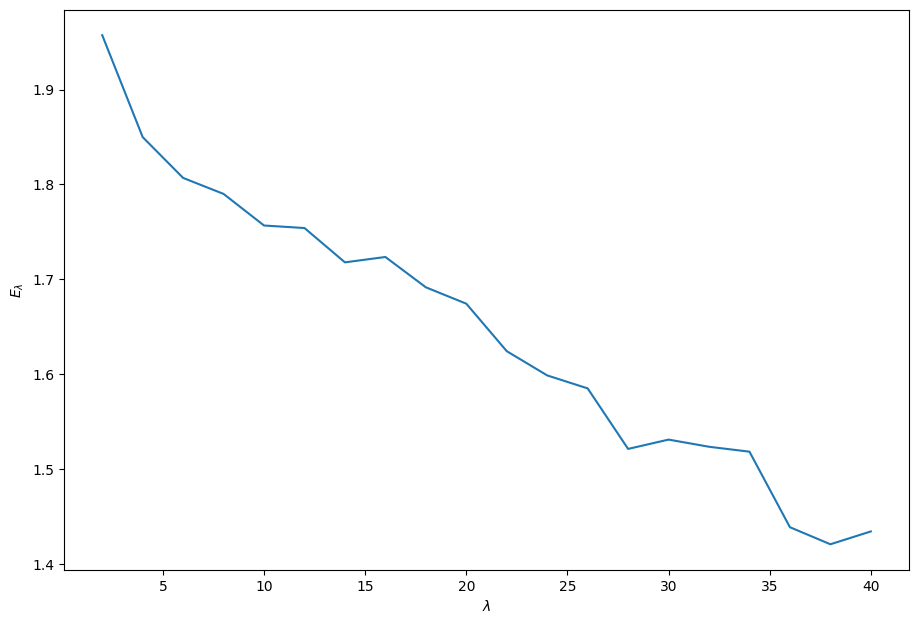

In [73]:
plt.figure(figsize=(24*len(ecr_result_dict['00']),16))
index = 1
for result in ecr_result_dict['00']:
    plt.subplot(2,2,index)
    plt.plot(lamb,result)
    plt.xlabel(r'$\lambda$')
    plt.ylabel(r'$E_{\lambda}$')
    index+=1

In [56]:
ecr_result_dict['11'][0]

[-1.9007369025530434,
 -1.8556112637103002,
 -1.8034894306018519,
 -1.748254984806555,
 -1.7411291084850404,
 -1.7242331205836159,
 -1.7117755463933744,
 -1.7142036448920877,
 -1.697008627248532,
 -1.6669273236167945,
 -1.639940580717361,
 -1.6245720403668322,
 -1.5927362239128195,
 -1.5580868245140902,
 -1.510770837608284,
 -1.5132637771349018,
 -1.52034642610448,
 -1.4715930080730748,
 -1.4626154790611414,
 -1.4357151908655807]